In [1]:
import numpy as np
import numpy.random as npr
import math
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import natsort

import time
import sys
import os.path
import glob
import os

In [65]:
PATH = '../data/era-discretizations/'
PATH_TO_VISUALS = '../../../thesis-visuals/'

In [66]:
def get_data(files):
    files = natsort.natsorted(glob.glob(files))
    dfs = [pd.read_csv(f) for f in files]
    filenames = [file.split('/')[-1][:-8] for file in files]
    for df, file in zip(dfs, filenames):
        df['file'] = file
    return pd.concat(dfs).reset_index(drop=True)

# lets iterate one point mass at a time

In [453]:
''' 
support = [1, 1_000_000, 33.6548, 17.1463, 50.1830, 3.1103, 64.4149, 78.5005, 6.6654, 74.8116, 40.8516, 31.2373]
sup_cols = [f'sup_{i+1}' for i in range(len(support))]
files = PATH+f'pms/*-pms-test-*-res.csv'
df = get_data(files)
df['support_size'] = df.file.apply(lambda s: int(s.split('-')[0]))

fig, ax = plt.subplots(sharex=True)

for i in range(2, len(support)+2):
    temp = df[df.support_size == i]
    best_rev_of_pms[i] = temp.rev_100.max()

    plt.figure(figsize=(8,5))
    plt.plot(temp[sup_cols[:i]].replace(support, np.nan).max(axis=1), temp.rev_100, '+', label='Trial Revenue')
    

    for point in support[:i-1]:
        if point != 1_000_000:
            plt.axvline(x=point, linestyle=':', color='red')

    plt.gca().set_facecolor('#f0f0f0')
    plt.gca().grid(color='white')
    plt.xlabel('Support Value', fontsize=11)
    plt.ylabel('Revenue', fontsize=11)
    plt.title(f'Revenue of {i} Point Masses')
    plt.legend()
    # plt.savefig(PATH_TO_VISUALS+'re-three-pms.png', dpi=300)
    plt.xlim(0,100)
    plt.show()
    
plt.figure(figsize=(8,5))
plt.plot(best_rev_of_pms.keys(), best_rev_of_pms.values(), '+', label='Best Revenue')
plt.gca().set_facecolor('#f0f0f0')
plt.gca().grid(color='white')
plt.xlabel('Support Size', fontsize=11)
plt.ylabel('Revenue', fontsize=11)
plt.title(f'Best revenue vs Number of Point Masses')
plt.legend()
# plt.savefig(PATH_TO_VISUALS+'re-three-pms.png', dpi=300)
plt.show()
'''

" \nsupport = [1, 1_000_000, 33.6548, 17.1463, 50.1830, 3.1103, 64.4149, 78.5005, 6.6654, 74.8116, 40.8516, 31.2373]\nsup_cols = [f'sup_{i+1}' for i in range(len(support))]\nfiles = PATH+f'pms/*-pms-test-*-res.csv'\ndf = get_data(files)\ndf['support_size'] = df.file.apply(lambda s: int(s.split('-')[0]))\n\nfig, ax = plt.subplots(sharex=True)\n\nfor i in range(2, len(support)+2):\n    temp = df[df.support_size == i]\n    best_rev_of_pms[i] = temp.rev_100.max()\n\n    plt.figure(figsize=(8,5))\n    plt.plot(temp[sup_cols[:i]].replace(support, np.nan).max(axis=1), temp.rev_100, '+', label='Trial Revenue')\n    \n\n    for point in support[:i-1]:\n        if point != 1_000_000:\n            plt.axvline(x=point, linestyle=':', color='red')\n\n    plt.gca().set_facecolor('#f0f0f0')\n    plt.gca().grid(color='white')\n    plt.xlabel('Support Value', fontsize=11)\n    plt.ylabel('Revenue', fontsize=11)\n    plt.title(f'Revenue of {i} Point Masses')\n    plt.legend()\n    # plt.savefig(PATH_TO_

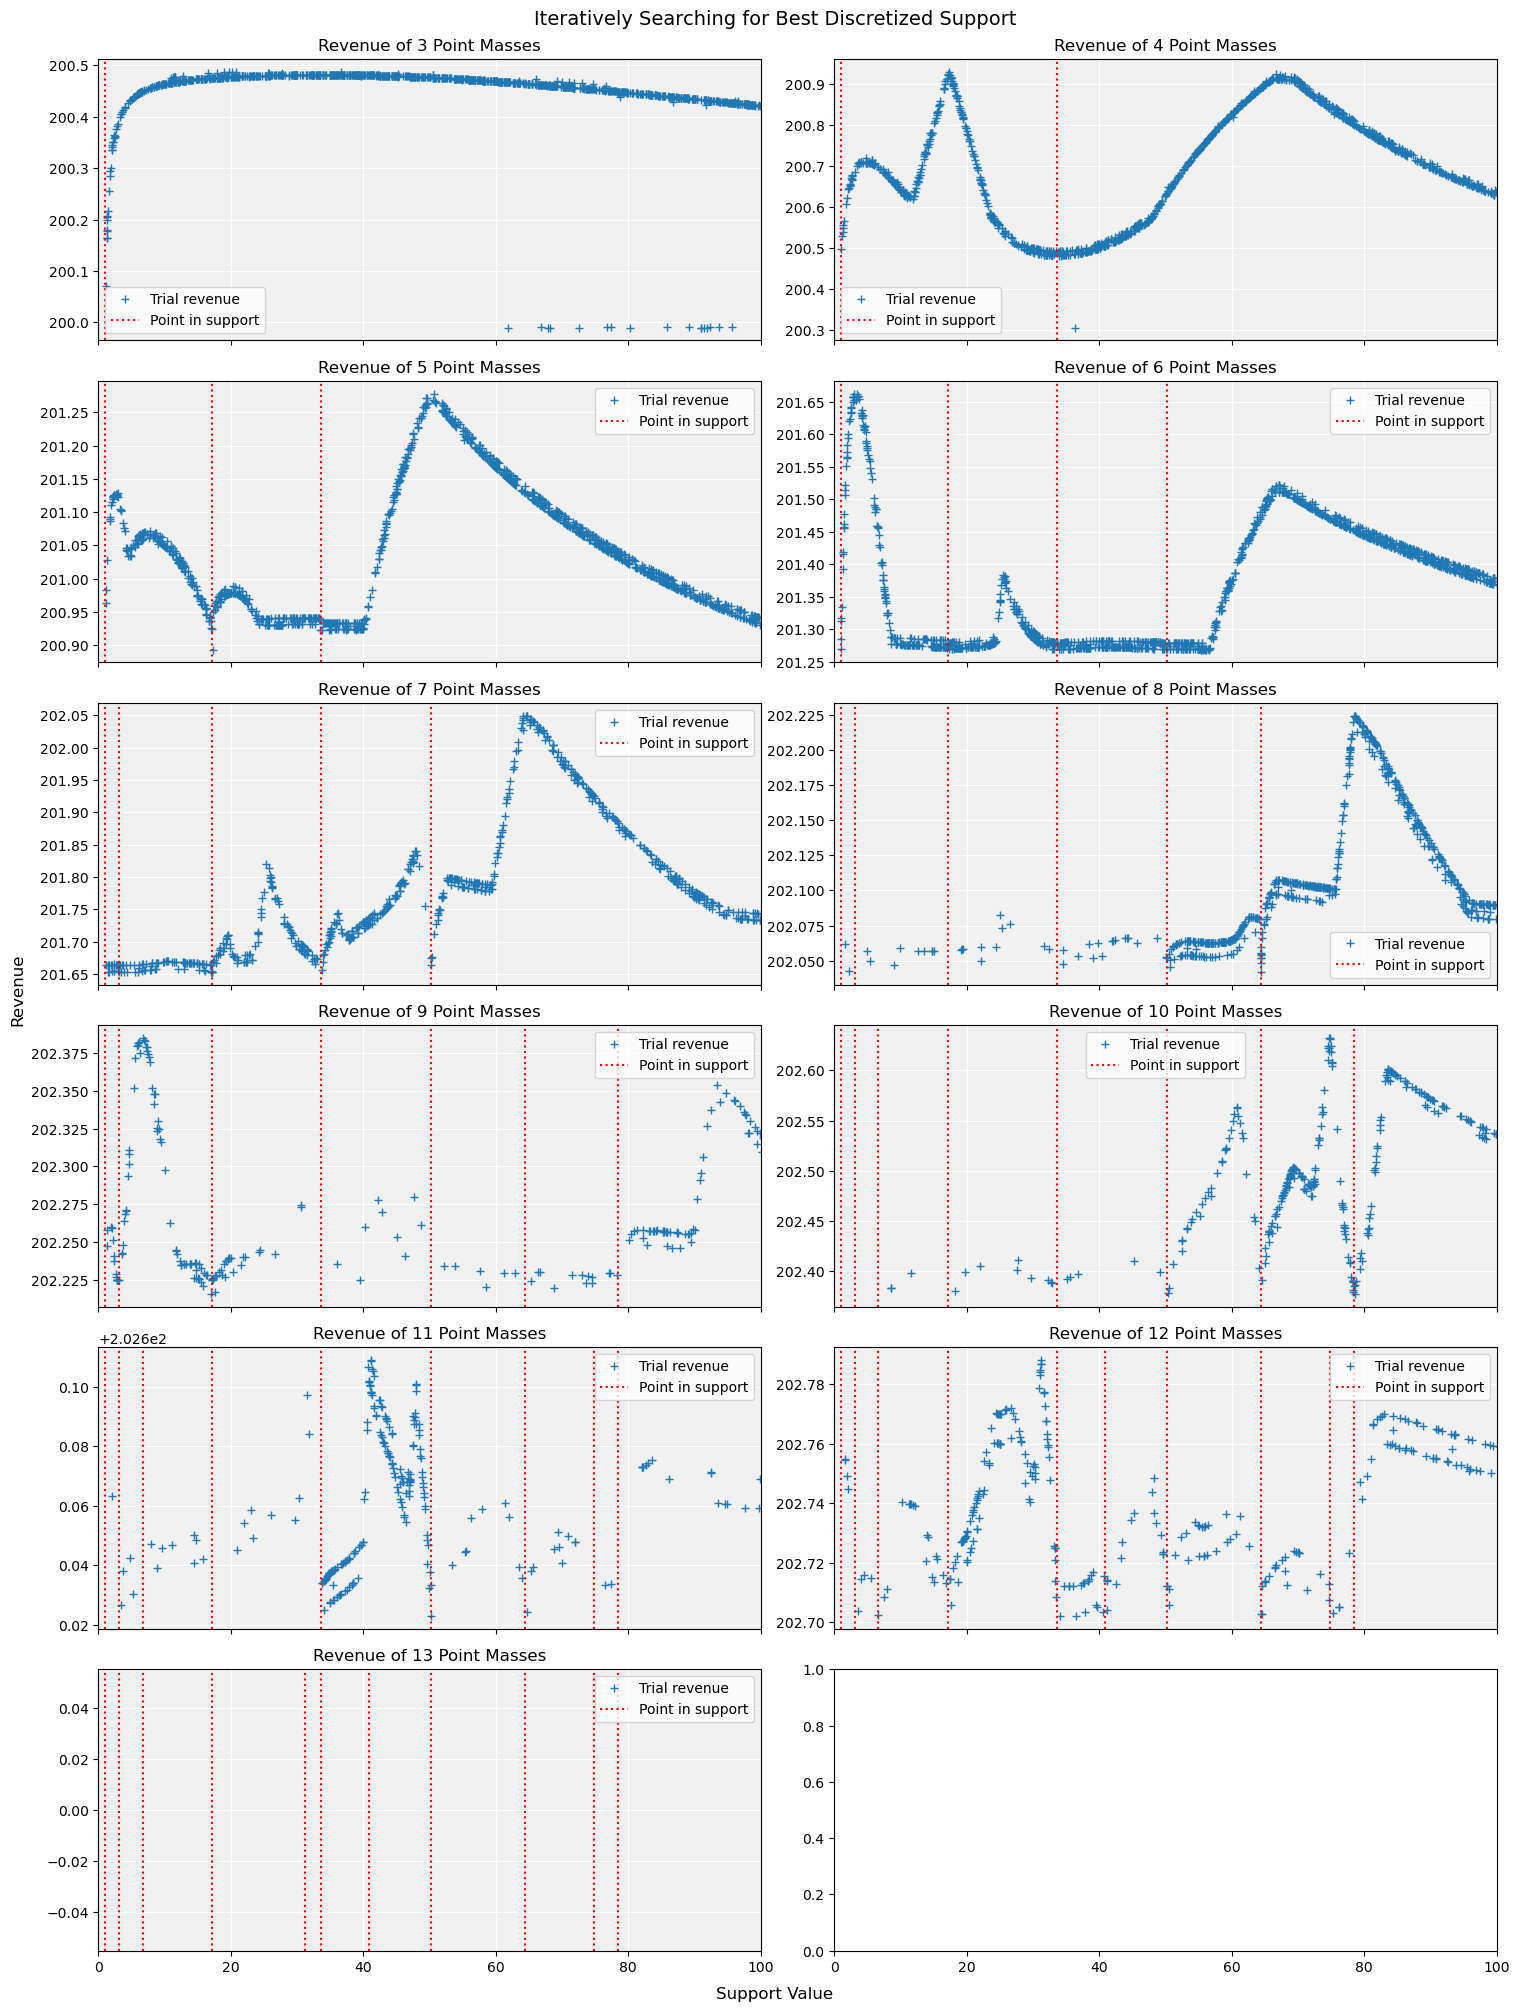

In [675]:
import matplotlib.pyplot as plt

support = [1, 1_000_000, 33.6548, 17.1463, 50.1830, 3.1103, 64.4149, 78.5005, 6.6654, 74.8116, 40.8516, 31.2373]
sup_cols = [f'sup_{i+1}' for i in range(len(support))]
files = PATH+f'pms/*-pms-test-*-res.csv'
df = get_data(files)
df['support_size'] = df.file.apply(lambda s: int(s.split('-')[0]))

fig, axs = plt.subplots(6, 2, figsize=(15, 20), sharex=True)
axs = axs.flatten()

for i in range(3, len(support) + 2):
    temp = df[df.support_size == i]
    best_rev_of_pms[i] = temp.rev_100.max()

    axs[i-3].plot(temp[sup_cols[:i]].replace(support, np.nan).max(axis=1), temp.rev_100, '+', label='Trial revenue')

    line_printed=False
    for point in support[:i - 1]:
        if point != 1_000_000 and not line_printed:
            axs[i-3].axvline(x=point, linestyle=':', color='red', label='Point in support')
            line_printed=True
        elif point != 1_000_000:
            axs[i-3].axvline(x=point, linestyle=':', color='red')

    axs[i-3].set_facecolor('#f0f0f0')
    axs[i-3].grid(color='white')
    axs[i-3].set_title(f'Revenue of {i} Point Masses')
    axs[i-3].legend()
    axs[i-3].set_xlim(0, 100)

fig.text(0.5, -0.002, 'Support Value', ha='center', va='center', fontsize=12)
fig.text(-0.005, 0.5, 'Revenue', ha='center', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Iteratively Searching for Best Discretized Support', fontsize=14, y=.99)
plt.tight_layout()

# plt.savefig(PATH_TO_VISUALS+'re-iterative-search-grid.png', bbox_inches='tight', dpi=300)
plt.show()


In [594]:
df[df.support_size == 12].sort_values(by='rev_100', ascending=False).head(10)

,trial,rev_100,sup_1,sup_2,file,sup_3,sup_4,sup_5,sup_6,sup_7,sup_8,sup_9,sup_10,sup_11,sup_12,support_size
11293,1,202.7888,1.0,3.1103,12-pms-test-4,6.6654,17.1463,31.2373,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11177,20,202.7881,1.0,3.1103,12-pms-test-3,6.6654,17.1463,31.2083,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11183,26,202.7869,1.0,3.1103,12-pms-test-3,6.6654,17.1463,31.1612,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11328,40,202.7866,1.0,3.1103,12-pms-test-4,6.6654,17.1463,31.1488,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11317,29,202.7847,1.0,3.1103,12-pms-test-4,6.6654,17.1463,31.0753,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11351,63,202.7841,1.0,3.1103,12-pms-test-4,6.6654,17.1463,31.0546,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11338,46,202.7831,1.0,3.1103,12-pms-test-4,6.6654,17.1463,31.0196,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11349,60,202.7786,1.0,3.1103,12-pms-test-4,6.6654,17.1463,30.8662,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11327,39,202.7774,1.0,3.1103,12-pms-test-4,6.6654,17.1463,31.6770,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12
11228,72,202.7771,1.0,3.1103,12-pms-test-3,6.6654,17.1463,31.6869,33.6548,40.8516,50.183,64.4149,74.8116,78.5005,1000000.0,12


(array([6.21751453e+02, 2.07377476e+01, 4.38571503e-02, 3.11564532e+00,
        1.84955739e-06, 1.02119037e-01]),
 0.0013094891146804815)

[6.21751453e+02 2.07377476e+01 4.38571503e-02 3.11564532e+00
 1.84955739e-06 1.02119037e-01] 0.0013094891146804815


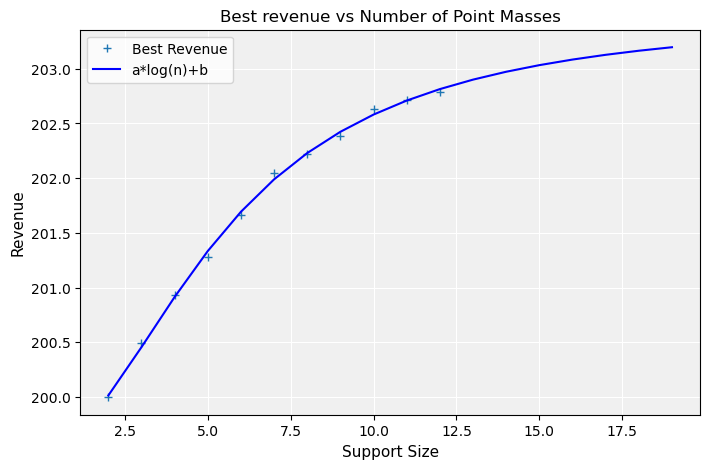

In [599]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d, e, f):
    return (a + b*np.exp(np.log(x))**2 + c*np.exp(np.log(x))**2) / (d + e*np.exp(np.log(x)) + f*np.exp(np.log(x))**2)

x = list(range(2,13))
y = list(best_rev_of_pms.values())[:-1]

popt, pcov = curve_fit(func, x, y, bounds=(0, np.inf))
# Calculate the mean squared error of the fit
y_fit = func(x, *popt)
residuals = y - y_fit
mse = np.mean(residuals**2)

print(popt, mse)

plt.figure(figsize=(8,5))
plt.plot(best_rev_of_pms.keys(), best_rev_of_pms.values(), '+', label='Best Revenue')
ticks = list(range(2, 20))
plt.plot(ticks, [func(t, *popt) for t in ticks], 'b', label='a*log(n)+b')
plt.gca().set_facecolor('#f0f0f0')
plt.gca().grid(color='white')
plt.xlabel('Support Size', fontsize=11)
plt.ylabel('Revenue', fontsize=11)
plt.title(f'Best revenue vs Number of Point Masses')
plt.legend()
#plt.savefig(PATH_TO_VISUALS+'re-best-rev-vs-support-size.png', dpi=300)
plt.show()

## lets see if transitivity holds

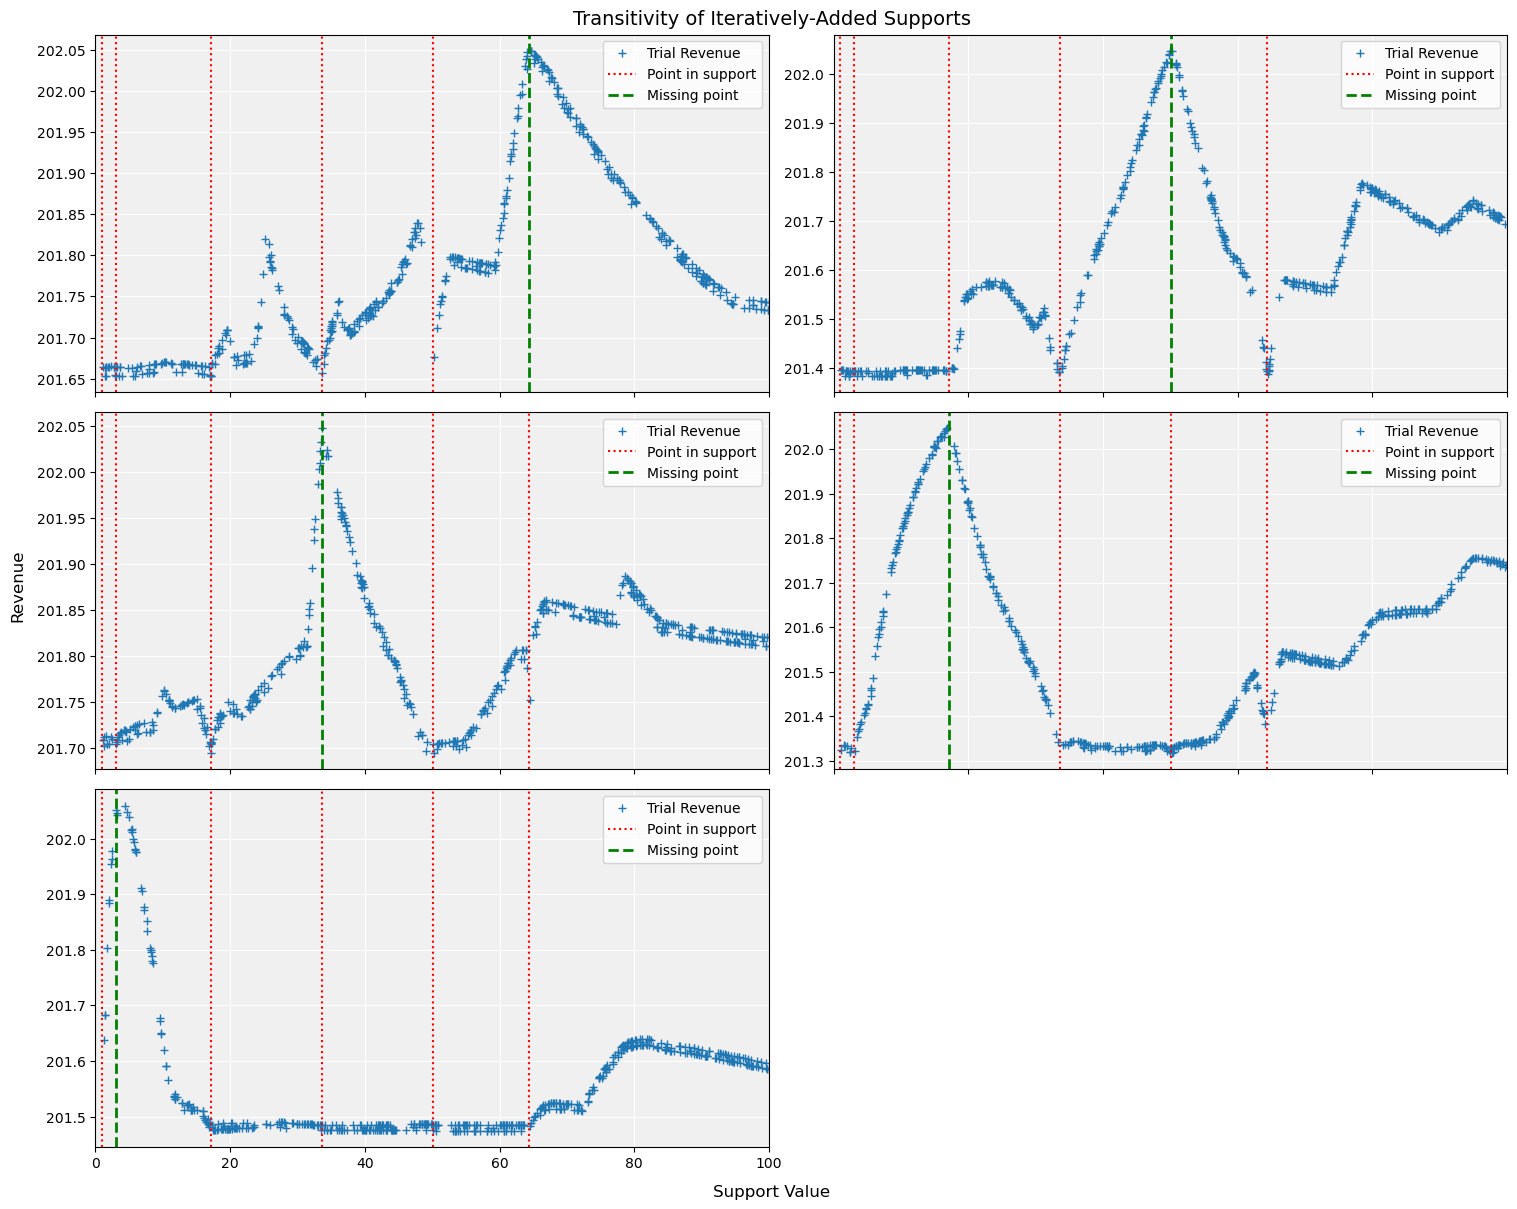

In [667]:
support = [1, 1_000_000, 33.6548, 17.1463, 50.1830, 3.1103, 64.4149, 78.5005, 6.6654, 74.8116, 40.8516, 31.2373]
sup_cols = [f'sup_{i+1}' for i in range(len(support))]
files = PATH+f'pms/7*-res.csv'
df = get_data(files)
df['support_size'] = df.file.apply(lambda s: int(s.split('-')[0]))

fig, axs = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
axs = axs.flatten()

pms = 7

for i, f in enumerate(sorted(df.file.unique())[1:]):
    temp = df[df.file == f]
    axs[i].plot(temp[sup_cols[:pms]].replace(support, np.nan).max(axis=1), temp.rev_100, '+', label='Trial Revenue')

    missing = list(set(support[:7]) - set(temp.iloc[0].values))[0]

    line_printed=False
    #if i == 4: break
    for point in support[:pms]:
        if point == missing:
            axs[i].axvline(x=point, linestyle='--', color='green', linewidth=2, label='Missing point')
        elif point != 1_000_000 and not line_printed and point != missing:
            axs[i].axvline(x=point, linestyle=':', color='red', label='Point in support')
            line_printed=True
        elif point != 1_000_000:
            axs[i].axvline(x=point, linestyle=':', color='red')

    axs[i].set_facecolor('#f0f0f0')
    axs[i].grid(color='white')
    #axs[i].set_title(f'{f} missing {missing}')
    axs[i].legend()
    axs[i].set_xlim(0, 100)

axs[-1].axis('off')
fig.text(0.5, -0.005, 'Support Value', ha='center', va='center', fontsize=12)
fig.text(-0.003, 0.5, 'Revenue', ha='center', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Transitivity of Iteratively-Added Supports', fontsize=14)
plt.tight_layout()

plt.savefig(PATH_TO_VISUALS+'re-iterative-transitivity.png', bbox_inches='tight', dpi=300)

plt.show()

In [670]:
support

[1,
 1000000,
 33.6548,
 17.1463,
 50.183,
 3.1103,
 64.4149,
 78.5005,
 6.6654,
 74.8116,
 40.8516,
 31.2373]

# now lets broadly move around bulk and see how it looks

In [263]:
df_revs.T.columns.unique()

Index(['test4', 'test2', 'test3', 'test1', 'test5', 'test6', 'test8', 'test7',
       'test0', 'testsmall0', 'testsmall1', 'testsmall2', 'testsmall3',
       'testsmall4'],
      dtype='object', name='file')

In [467]:
df_revs

,rev_1,rev_5,rev_10,rev_20,rev_30,rev_40,rev_50,rev_100,rev_150,rev_200
file,,,,,,,,,,
test4,NaN,NaN,NaN,NaN,NaN,NaN,1.8684,2.3213,2.5244,2.5875
test2,NaN,NaN,NaN,NaN,NaN,NaN,1.9231,2.3023,2.4472,2.5128
test3,NaN,NaN,NaN,NaN,NaN,NaN,1.8481,2.2610,2.3873,2.4610
test2,NaN,NaN,NaN,NaN,NaN,NaN,1.8875,2.2394,2.3402,2.4100
test3,NaN,NaN,NaN,NaN,NaN,NaN,1.7598,2.2062,2.3764,2.4421
...,...,...,...,...,...,...,...,...,...,...
testsmall4,0.1191,0.5024,0.8198,1.1334,1.2374,1.2993,1.3173,NaN,NaN,NaN
testsmall4,0.1910,0.7473,1.1447,1.4851,1.5934,1.6278,1.6381,NaN,NaN,NaN
testsmall4,0.2473,0.7598,1.1168,1.4657,1.5821,1.6223,1.6364,NaN,NaN,NaN


In [472]:
df_revs.T.columns.unique()

Index(['test4', 'test2', 'test3', 'test1', 'test5', 'test6', 'test8', 'test7',
       'test0', 'testsmall0', 'testsmall1', 'testsmall2', 'testsmall3',
       'testsmall4', 'testsmall5', 'testsmall6', 'testsmall7', 'testsmall8'],
      dtype='object', name='file')

,rev_1,rev_5,rev_10,rev_20,rev_30,rev_40,rev_50,rev_100,rev_150,rev_200
file,,,,,,,,,,
test4,NaN,NaN,NaN,NaN,NaN,NaN,1.8684,2.3213,2.5244,2.5875
test2,NaN,NaN,NaN,NaN,NaN,NaN,1.9231,2.3023,2.4472,2.5128
test3,NaN,NaN,NaN,NaN,NaN,NaN,1.8481,2.2610,2.3873,2.4610
test2,NaN,NaN,NaN,NaN,NaN,NaN,1.8875,2.2394,2.3402,2.4100
test3,NaN,NaN,NaN,NaN,NaN,NaN,1.7598,2.2062,2.3764,2.4421
...,...,...,...,...,...,...,...,...,...,...
testsmall11,0.0000,0.6854,0.9649,1.2489,1.4344,1.5746,1.6811,NaN,NaN,NaN
testsmall11,0.0778,0.3237,0.5394,0.8295,1.0297,1.1810,1.2960,NaN,NaN,NaN
testsmall11,0.0770,0.3244,0.5463,0.8486,1.0575,1.2126,1.3309,NaN,NaN,NaN


In [578]:
df

,trial,rev_50,rev_100,rev_150,rev_200,sup_1,sup_2,sup_3,sup_4,sup_5,...,rev_1,rev_5,rev_10,rev_20,rev_30,rev_40,rev_60,rev_70,rev_80,rev_90
0,85,102.0969,202.3746,NaN,NaN,1.0,4.4573,11.4082,18.6194,29.7566,...,NaN,NaN,NaN,NaN,NaN,NaN,122.1898,142.2614,162.3113,182.3484
1,62,102.1240,202.3278,NaN,NaN,1.0,2.5950,10.3757,18.7739,25.5666,...,NaN,NaN,NaN,NaN,NaN,NaN,122.2048,142.2601,162.2980,182.3215
2,72,101.8684,202.3213,302.5244,402.5875,1.0,4.7741,13.3035,24.6605,52.0003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,101.9231,202.3023,302.4472,402.5128,1.0,4.1076,18.8287,22.9661,37.2355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,102.0750,202.2961,NaN,NaN,1.0,2.6573,6.2397,11.2107,23.6030,...,NaN,NaN,NaN,NaN,NaN,NaN,122.1551,142.2115,162.2455,182.2708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,96,101.6811,NaN,NaN,NaN,1.0,4.3956,7.3408,14.4873,53.4948,...,2.0000,10.6854,20.9649,41.2489,61.4344,81.5746,NaN,NaN,NaN,NaN
2196,97,101.2960,NaN,NaN,NaN,1.0,11.7350,47.0820,47.7139,60.3235,...,2.0778,10.3237,20.5394,40.8295,61.0297,81.1810,NaN,NaN,NaN,NaN
2197,98,101.3309,NaN,NaN,NaN,1.0,11.8875,44.1696,49.4568,51.7920,...,2.0770,10.3244,20.5463,40.8486,61.0575,81.2126,NaN,NaN,NaN,NaN
2198,99,101.3780,NaN,NaN,NaN,1.0,16.3594,17.9942,28.5780,37.5114,...,2.0601,10.2783,20.5075,40.8546,61.0931,81.2602,NaN,NaN,NaN,NaN


testsmedium2 red
testsmedium3 blue
testsmedium1 green
testsmedium4 orange
test4 yellow
test2 black
test3 purple
test1 red
test5 blue
test6 green
test8 orange
test7 yellow
test0 black
testsmall0 purple
testsmall1 red
testsmall2 blue
testsmall3 green
testsmall4 orange
testsmall5 yellow
testsmall6 black
testsmall7 purple


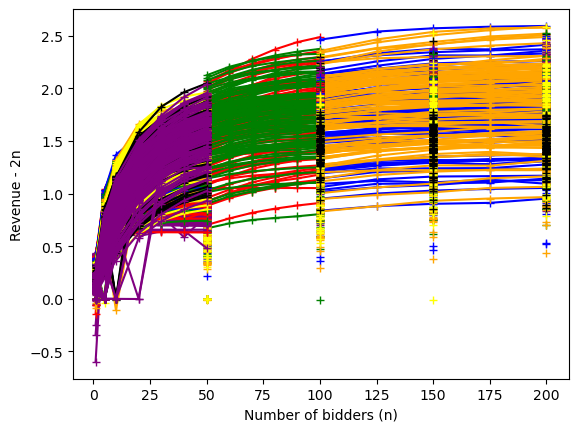

"for col in df_revs.columns:\n    n = int(col.split('_')[-1])\n    x = [n] * df.shape[0]\n    y = df[col] - 2*n\n    plt.scatter(x,y, marker='+')"

In [590]:
files = PATH+'moving-bulk-first-take/test*-res.csv'
bmps = np.array([1,5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200])
rev_cols = [f'rev_{bmp}' for bmp in bmps]
df = get_data(files)
df = df.sort_values(by='rev_100', ascending=False)
df = df.reset_index(drop=True)
df_revs = df.set_index('file')[rev_cols] - 2*bmps
df_revs.columns = bmps

# df_revs.T.plot(color='blue')

colors = ['red', 'blue', 'green', 'orange', 'yellow', 'black', 'purple'] * 3
num_files = len(df_revs.T.columns.unique())

for file, color in zip(df_revs.T.columns.unique(), colors[:num_files]):
    plt.plot(df_revs.T[[file]], color=color, label=file, marker='+')
    print(file, color)

'''xticks_pos = rev_cols  # Specify the positions of the xticks
xticks_labels = bmps  # Specify the labels of the xticks
plt.xticks(xticks_pos, xticks_labels)'''

plt.xlabel('Number of bidders (n)')
plt.ylabel('Revenue - 2n')
plt.show()

'''for col in df_revs.columns:
    n = int(col.split('_')[-1])
    x = [n] * df.shape[0]
    y = df[col] - 2*n
    plt.scatter(x,y, marker='+')'''

/var/folders/jf/z2mj2s1163z1wn19j7pvcdx40000gn/T/ipykernel_53117/4104774243.py:2: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


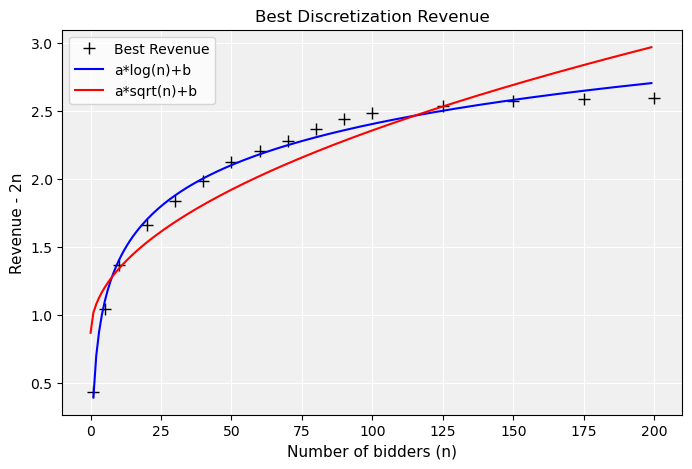

[0.43669536 0.39424029] 0.002896872415138768
[0.14899377 0.86817582] 0.051987068285961203


In [591]:
def log_func(x, a, b):
    return a * np.log(x) + b

def sqrt_func(x, a, b):
    return a * np.sqrt(x) + b

x = bmps
y = df_revs.max(axis=0).values

popt_log, pcov_log = curve_fit(log_func, x, y)
popt_sqrt, pcov_sqrt = curve_fit(sqrt_func, x, y)

# Calculate the mean squared error of the fit
y_fit = log_func(x, *popt_log)
residuals = y - y_fit
mse_log = np.mean(residuals**2)

y_fit = sqrt_func(x, *popt_sqrt)
residuals = y - y_fit
mse_sqrt = np.mean(residuals**2)

plt.figure(figsize=(8,5))
plt.plot(x, y, '+', markersize=8, color='black', label='Best Revenue')
ticks = list(range(200))
plt.plot(ticks, [log_func(t, *popt_log) for t in ticks], 'b', label='a*log(n)+b')
plt.plot(ticks, [sqrt_func(t, *popt_sqrt) for t in ticks], 'r', label='a*sqrt(n)+b')
plt.gca().set_facecolor('#f0f0f0')
plt.gca().grid(color='white')
plt.xlabel('Number of bidders (n)', fontsize=11)
plt.ylabel('Revenue - 2n', fontsize=11)
plt.title(f'Best Discretization Revenue')
plt.legend()
plt.savefig(PATH_TO_VISUALS+'re-era-best-discretization-graph.png', dpi=300)
plt.show()

print(popt_log, mse_log)
print(popt_sqrt, mse_sqrt)

In [561]:
df_revs.groupby('file').max()

,1,5,10,20,30,40,50,100,150,200
file,,,,,,,,,,
test0,NaN,NaN,NaN,NaN,NaN,NaN,1.7682,1.7751,1.7796,1.7458
test1,NaN,NaN,NaN,NaN,NaN,NaN,1.9435,2.1123,2.1495,2.1573
test2,NaN,NaN,NaN,NaN,NaN,NaN,1.9231,2.3023,2.4472,2.5128
test3,NaN,NaN,NaN,NaN,NaN,NaN,1.8481,2.2610,2.3873,2.4815
test4,NaN,NaN,NaN,NaN,NaN,NaN,1.8684,2.3213,2.5244,2.5875
test5,NaN,NaN,NaN,NaN,NaN,NaN,1.8291,2.1040,2.3508,2.4967
test6,NaN,NaN,NaN,NaN,NaN,NaN,1.6127,2.0717,2.3282,2.5244
test7,NaN,NaN,NaN,NaN,NaN,NaN,1.4241,1.9292,2.2447,2.4605
test8,NaN,NaN,NaN,NaN,NaN,NaN,1.4616,1.9361,2.2126,2.4134


In [446]:
df.sort_values(by='rev_100', ascending=False).head(20)

,trial,rev_50,rev_100,rev_150,rev_200,sup_1,sup_2,sup_3,sup_4,sup_5,...,sup_8,sup_9,sup_10,file,rev_1,rev_5,rev_10,rev_20,rev_30,rev_40
0,72,101.8684,202.3213,302.5244,402.5875,1.0,4.7741,13.3035,24.6605,52.0003,...,121.4187,151.9525,1000000.0,test4,NaN,NaN,NaN,NaN,NaN,NaN
1,20,101.9231,202.3023,302.4472,402.5128,1.0,4.1076,18.8287,22.9661,37.2355,...,71.9497,87.1189,1000000.0,test2,NaN,NaN,NaN,NaN,NaN,NaN
2,28,101.8481,202.2610,302.3873,402.4610,1.0,4.2350,11.4659,24.1092,46.4403,...,103.6733,140.2239,1000000.0,test3,NaN,NaN,NaN,NaN,NaN,NaN
3,22,101.8875,202.2394,302.3402,402.4100,1.0,4.5711,9.8965,12.3905,34.0847,...,92.1871,97.3154,1000000.0,test2,NaN,NaN,NaN,NaN,NaN,NaN
4,22,101.7598,202.2062,302.3764,402.4421,1.0,4.1872,14.3357,28.3641,74.5073,...,106.0704,120.2839,1000000.0,test3,NaN,NaN,NaN,NaN,NaN,NaN
5,16,101.8174,202.1998,302.3379,402.3737,1.0,4.6619,14.9828,26.2361,60.6968,...,77.1940,84.4311,1000000.0,test2,NaN,NaN,NaN,NaN,NaN,NaN
6,21,101.8626,202.1923,302.2679,402.2815,1.0,5.2577,6.4327,11.6843,17.6401,...,69.2647,84.6083,1000000.0,test2,NaN,NaN,NaN,NaN,NaN,NaN
7,94,101.8413,202.1921,302.3231,402.3701,1.0,6.1345,18.4112,19.6804,32.2882,...,85.7917,94.5553,1000000.0,test2,NaN,NaN,NaN,NaN,NaN,NaN
8,27,101.7148,202.1755,302.3474,402.4205,1.0,3.8392,22.0584,45.5514,58.8456,...,94.6749,98.4791,1000000.0,test2,NaN,NaN,NaN,NaN,NaN,NaN
9,90,101.8160,202.1622,302.3030,402.3747,1.0,3.4439,14.0721,30.8506,38.0708,...,119.3290,139.9463,1000000.0,test3,NaN,NaN,NaN,NaN,NaN,NaN


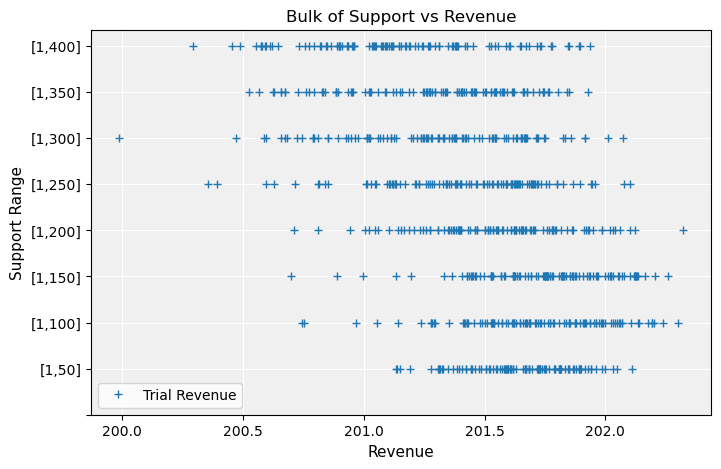

In [449]:
temp = df.loc[df.rev_100.notna()].copy()
temp['file_number'] = temp.file.apply(lambda s: int(s[-1]))
temp = temp[temp.file_number > 0]

plt.figure(figsize=(8,5))
plt.plot(temp.rev_100, temp.file_number, '+', label='Trial Revenue')


plt.gca().set_facecolor('#f0f0f0')
plt.gca().grid(color='white')
plt.xlabel('Revenue', fontsize=11)
plt.ylabel('Support Range', fontsize=11)
plt.title(f'Bulk of Support vs Revenue')
plt.legend()

x_ticks_new = [200 + 0.5*i for i in range(6)]
y_ticks_new = [''] + [f'[1,{50*i}]' for i in range(1,9)]
#plt.xticks(x_ticks_new)
plt.yticks(list(range(9)), y_ticks_new)

plt.savefig(PATH_TO_VISUALS+'re-bulk-vs-rev.png', dpi=300)
plt.show()

In [394]:
rev_cols = natsort.natsorted(df.columns[df.columns.str.contains('rev')].values)
df[rev_cols]

,rev_1,rev_5,rev_10,rev_20,rev_30,rev_40,rev_50,rev_100,rev_150,rev_200
0,NaN,NaN,NaN,NaN,NaN,NaN,101.8684,202.3213,302.5244,402.5875
1,NaN,NaN,NaN,NaN,NaN,NaN,101.9231,202.3023,302.4472,402.5128
2,NaN,NaN,NaN,NaN,NaN,NaN,101.8481,202.2610,302.3873,402.4610
3,NaN,NaN,NaN,NaN,NaN,NaN,101.8875,202.2394,302.3402,402.4100
4,NaN,NaN,NaN,NaN,NaN,NaN,101.7598,202.2062,302.3764,402.4421
...,...,...,...,...,...,...,...,...,...,...
1395,2.1191,10.5024,20.8198,41.1334,61.2374,81.2993,101.3173,NaN,NaN,NaN
1396,2.1910,10.7473,21.1447,41.4851,61.5934,81.6278,101.6381,NaN,NaN,NaN
1397,2.2473,10.7598,21.1168,41.4657,61.5821,81.6223,101.6364,NaN,NaN,NaN
1398,2.2367,10.8377,21.2160,41.5300,61.6260,81.6555,101.6648,NaN,NaN,NaN


['rev_1',
 'rev_5',
 'rev_10',
 'rev_20',
 'rev_30',
 'rev_40',
 'rev_50',
 'rev_100',
 'rev_150',
 'rev_200']